### Uber Data Analysis With Python

Uber Technologies, Inc., commonly known as Uber, is an American technology company. Its services include ride-hailing, food delivery, package delivery, couriers, freight transportation, and, through a partnership with Lime, electric bicycle and motorized scooter rental.

We will mainly use data regarding Uber rides.

We will use Python to analyze data from Uber.

### Analysis Tasks:
- **Check how long do people travel with Uber?**
- **What hour do most people take Uber to their destination?**
- **Which day has the highest number of trips?**
- **What are the number of trips per each day?**
- **What are the trips in the month?**
- **Where do people start boarding their trip from most?**
- **Check the purpose of trips**


In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
import calendar

In [10]:
data = pd.read_csv("C:\\Users\\RAHUL\\Downloads\\Uber Drives.csv")
data.head()

,START_DATE*,END_DATE*,CATEGORY*,START*,STOP*,MILES*,PURPOSE*
0,1/1/2016 21:11,1/1/2016 21:17,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain
1,1/2/2016 1:25,1/2/2016 1:37,Business,Fort Pierce,Fort Pierce,5.0,NaN
2,1/2/2016 20:25,1/2/2016 20:38,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies
3,1/5/2016 17:31,1/5/2016 17:45,Business,Fort Pierce,Fort Pierce,4.7,Meeting
4,1/6/2016 14:42,1/6/2016 15:49,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit


In [11]:
data.isnull()

,START_DATE*,END_DATE*,CATEGORY*,START*,STOP*,MILES*,PURPOSE*
0,False,False,False,False,False,False,False
1,False,False,False,False,False,False,True
2,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...
1151,False,False,False,False,False,False,False
1152,False,False,False,False,False,False,False
1153,False,False,False,False,False,False,False
1154,False,False,False,False,False,False,False


In [12]:
data.isnull().any()

START_DATE*    False
END_DATE*       True
CATEGORY*       True
START*          True
STOP*           True
MILES*         False
PURPOSE*        True
dtype: bool

In [13]:
data.isnull().sum()

START_DATE*      0
END_DATE*        1
CATEGORY*        1
START*           1
STOP*            1
MILES*           0
PURPOSE*       503
dtype: int64

In [17]:
data = data.dropna()

In [21]:
data.isnull().sum()

START_DATE*    0
END_DATE*      0
CATEGORY*      0
START*         0
STOP*          0
MILES*         0
PURPOSE*       0
dtype: int64

In [25]:
data.columns = data.columns.str.lower()
data.head()

,start_date*,end_date*,category*,start*,stop*,miles*,purpose*
0,1/1/2016 21:11,1/1/2016 21:17,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain
2,1/2/2016 20:25,1/2/2016 20:38,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies
3,1/5/2016 17:31,1/5/2016 17:45,Business,Fort Pierce,Fort Pierce,4.7,Meeting
4,1/6/2016 14:42,1/6/2016 15:49,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit
5,1/6/2016 17:15,1/6/2016 17:19,Business,West Palm Beach,West Palm Beach,4.3,Meal/Entertain


In [31]:
data = data.rename(columns={'start_date*':'start_date','end_date*':'end_date','category*':'category','start*':'start','stop*':'stop','miles*':'miles','purpose*':'purpose'})


In [33]:
data.head()

,start_date,end_date,category,start,stop,miles,purpose
0,2016-01-01 21:11:00,1/1/2016 21:17,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain
2,2016-01-02 20:25:00,1/2/2016 20:38,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies
3,2016-01-05 17:31:00,1/5/2016 17:45,Business,Fort Pierce,Fort Pierce,4.7,Meeting
4,2016-01-06 14:42:00,1/6/2016 15:49,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit
5,2016-01-06 17:15:00,1/6/2016 17:19,Business,West Palm Beach,West Palm Beach,4.3,Meal/Entertain


In [39]:
data.dtypes

start_date     object
end_date       object
category       object
start          object
stop           object
miles         float64
purpose        object
dtype: object

In [41]:
data['start_date'] = pd.to_datetime(data['start_date'], format="%m/%d/%Y %H:%M")
data['end_date'] = pd.to_datetime(data['end_date'], format="%m/%d/%Y %H:%M")

In [43]:
data.dtypes

start_date    datetime64[ns]
end_date      datetime64[ns]
category              object
start                 object
stop                  object
miles                float64
purpose               object
dtype: object

In [51]:
hour=[]
day=[]
dayofweek=[]
month=[]
weekday=[]
for x in data['start_date']:
    hour.append(x.hour)
    day.append(x.day)
    dayofweek.append(x.dayofweek)
    month.append(x.month)
    weekday.append(calendar.day_name[dayofweek[-1]])
data['hour']=hour
data['day']=day
data['day_of_week']=dayofweek
data['month']=month
data['weekday']=weekday

In [65]:
data.head()

,start_date,end_date,category,start,stop,miles,purpose,hour,day,day_of_week,month,weekday
0,2016-01-01 21:11:00,2016-01-01 21:17:00,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain,21,1,4,1,Friday
2,2016-01-02 20:25:00,2016-01-02 20:38:00,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies,20,2,5,1,Saturday
3,2016-01-05 17:31:00,2016-01-05 17:45:00,Business,Fort Pierce,Fort Pierce,4.7,Meeting,17,5,1,1,Tuesday
4,2016-01-06 14:42:00,2016-01-06 15:49:00,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit,14,6,2,1,Wednesday
5,2016-01-06 17:15:00,2016-01-06 17:19:00,Business,West Palm Beach,West Palm Beach,4.3,Meal/Entertain,17,6,2,1,Wednesday


In [67]:
data['category'].value_counts()

category
Business    647
Personal      6
Name: count, dtype: int64

<Axes: xlabel='category', ylabel='count'>

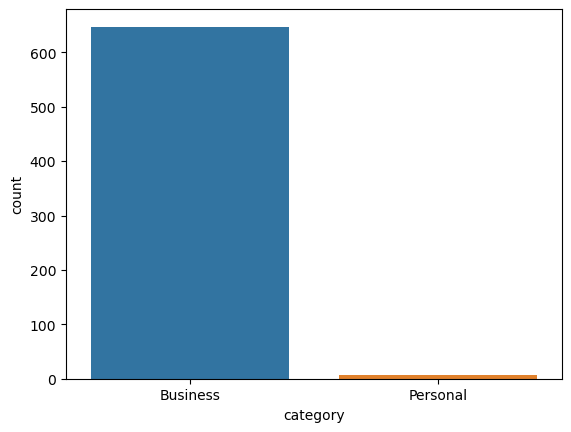

In [69]:
sns.countplot(x='category',data=data)

**Check how long do people travel with Uber?**

<Axes: ylabel='Frequency'>

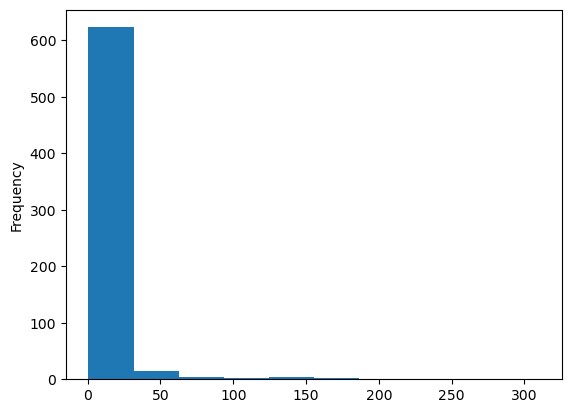

In [71]:
data['miles'].plot.hist()

**What hour do most people take Uber to their destination?**

Text(0.5, 1.0, 'Number of trips Vs hours')

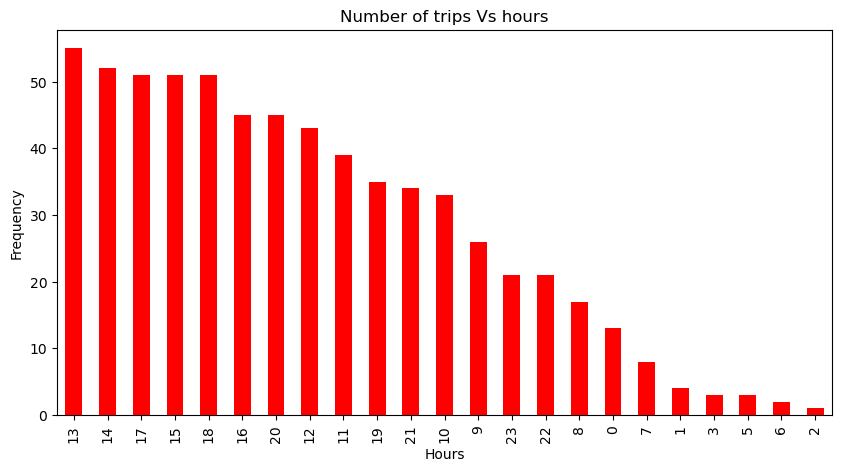

In [86]:
hours = data['start_date'].dt.hour.value_counts()
hours.plot(kind='bar',color='red',figsize=(10,5))
plt.xlabel('Hours')
plt.ylabel('Frequency')
plt.title('Number of trips Vs hours')

**Check the purpose of trips**

<Axes: xlabel='purpose'>

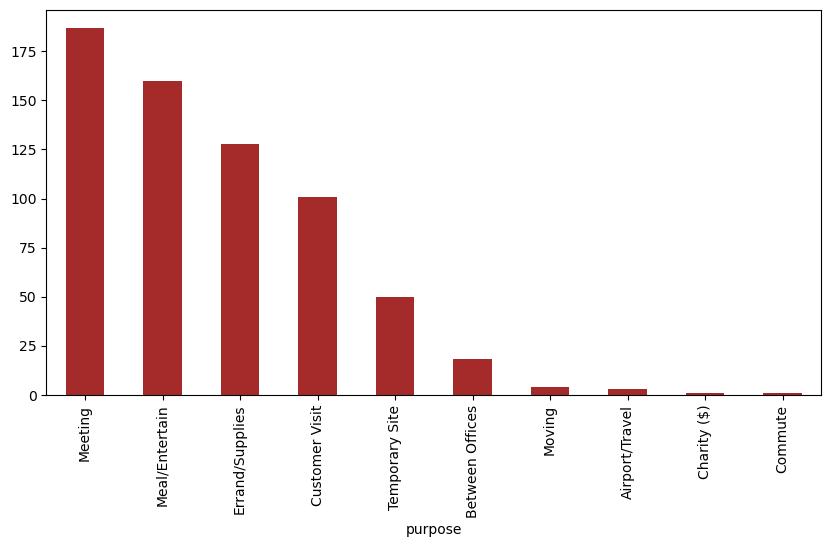

In [88]:
data['purpose'].value_counts().plot(kind='bar',figsize=(10,5),color='brown')

**Which day has the highest number of trips?**

<Axes: xlabel='weekday'>

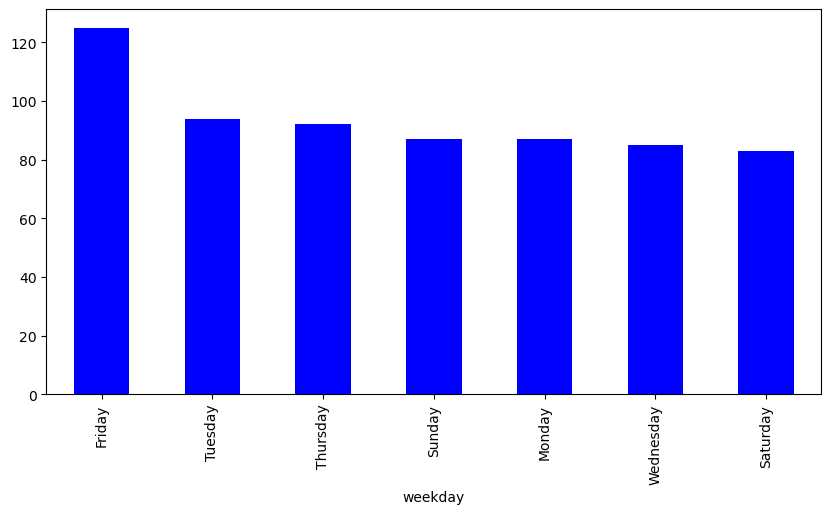

In [92]:
data['weekday'].value_counts().plot(kind='bar',figsize=(10,5),color='blue')

**What are the number of trips per each day?**

<Axes: xlabel='day'>

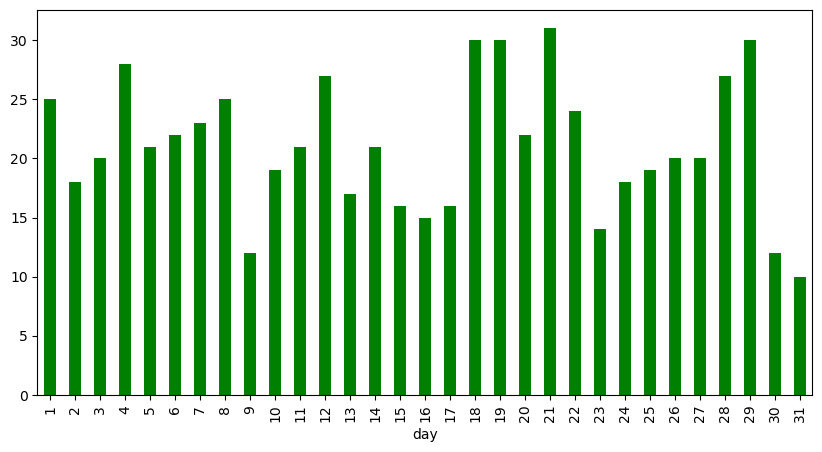

In [103]:
data['day'].value_counts().sort_index(ascending=True).plot(kind='bar',figsize=(10,5),color='green')

**What are the trips in the month?**

<Axes: xlabel='month'>

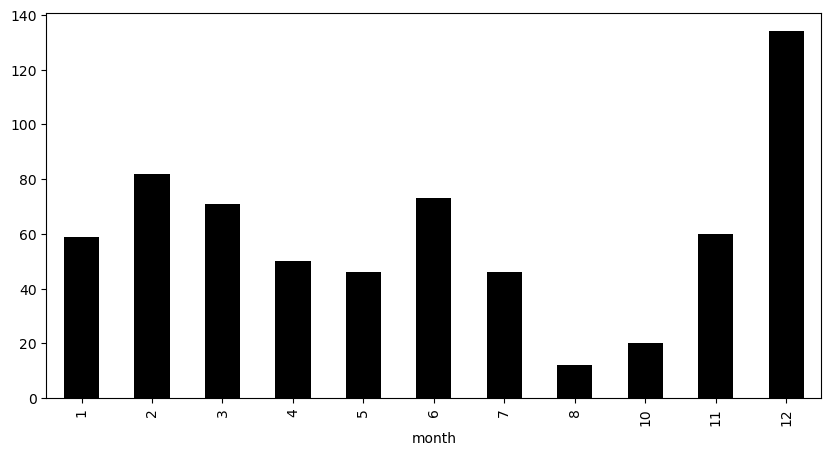

In [108]:
data['month'].value_counts().sort_index(ascending=True).plot(kind='bar',figsize=(10,5),color='black')

**Where do people start boarding their trip from most?**

<Axes: xlabel='start'>

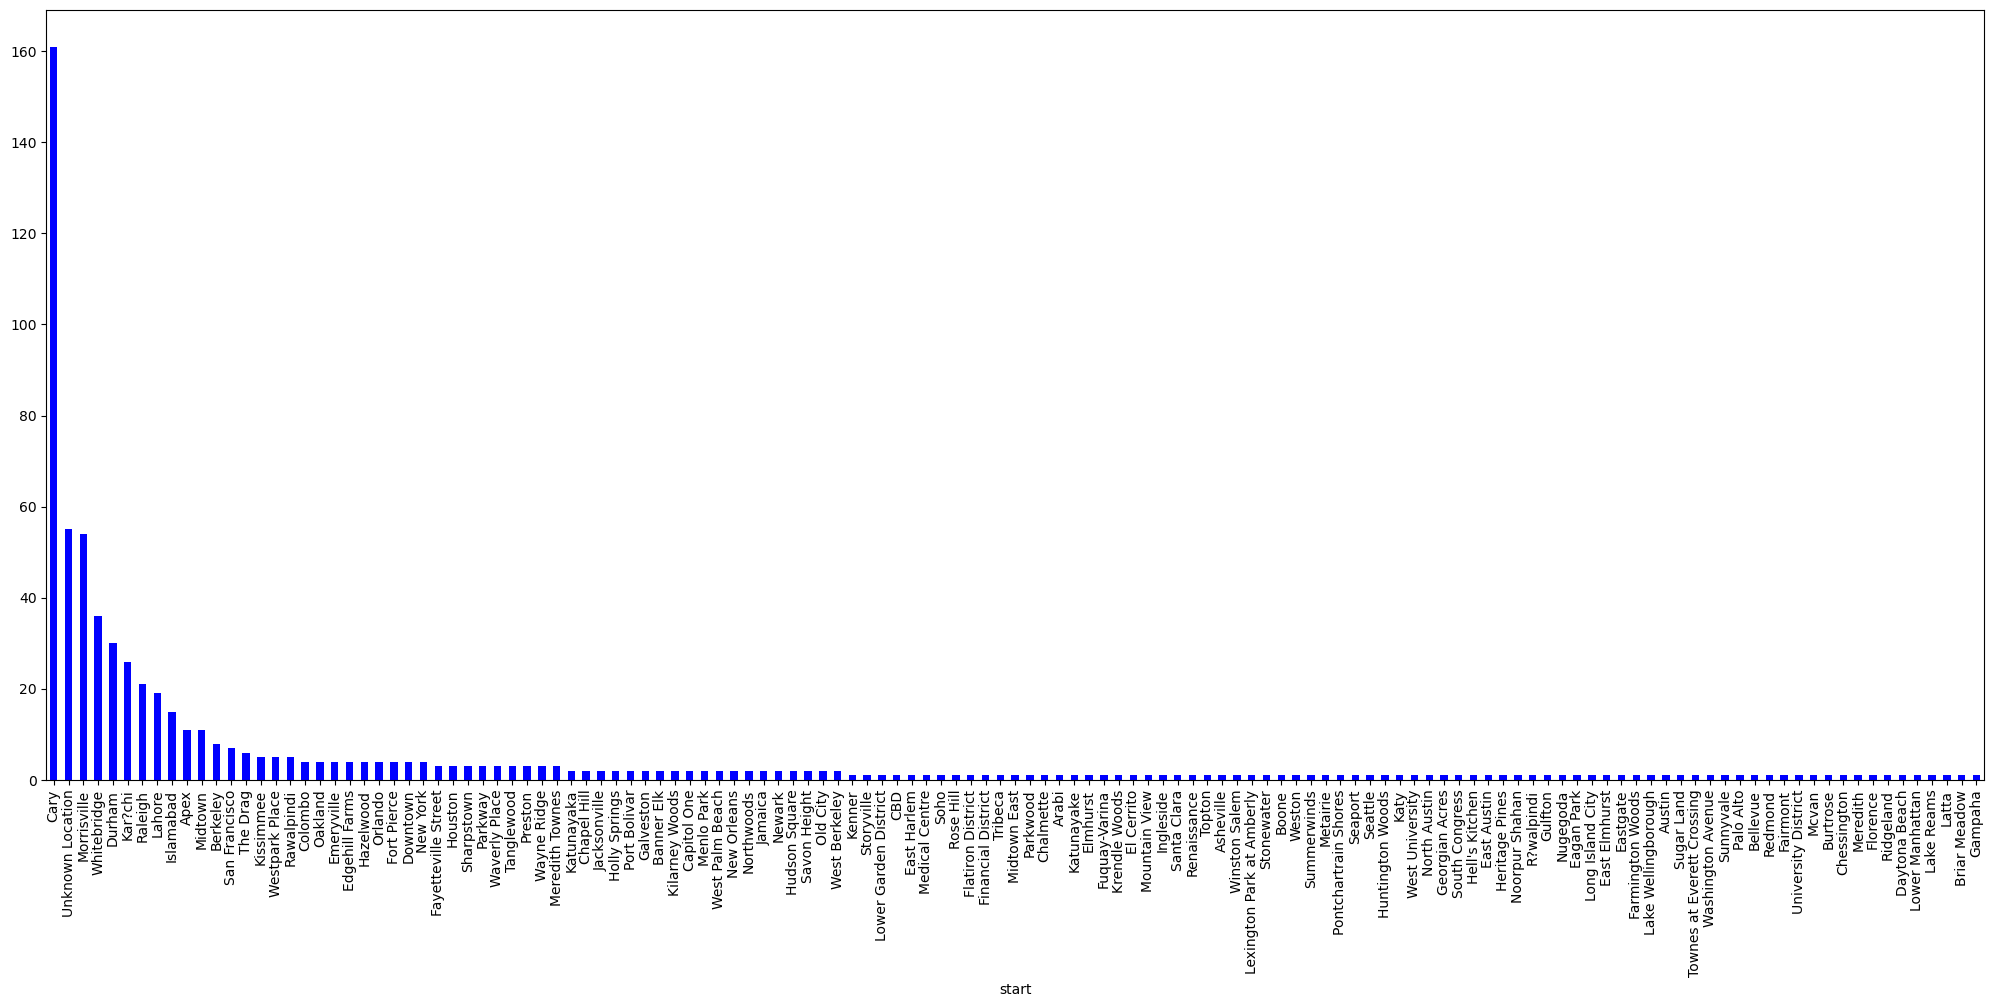

In [110]:
data['start'].value_counts().plot(kind='bar',figsize=(25,10),color='blue')